In [21]:
!pip install apyori

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import utils
%matplotlib inline
from apyori import apriori
import seaborn as sns

In [3]:
data = pd.read_csv('groceries.csv')

In [4]:
data.head()

,PurchaseID,Date,Item
0,1,1/1/2000,laundry detergent
1,1,1/1/2000,flour
2,1,1/1/2000,butter
3,1,1/1/2000,soap
4,1,1/1/2000,aluminum foil


In [5]:
data.tail()

,PurchaseID,Date,Item
29058,1499,2/26/2002,vegetables
29059,1499,2/26/2002,vegetables
29060,1499,2/26/2002,soda
29061,1499,2/26/2002,shampoo
29062,1499,2/26/2002,laundry detergent


In [6]:
data.describe()

,PurchaseID
count,29063.000000
mean,753.755978
std,431.334603
min,1.000000
25%,387.000000
50%,761.000000
75%,1127.000000
max,1499.000000


In [7]:
#Cheking for Null Values
data.isnull().any()

PurchaseID    False
Date          False
Item          False
dtype: bool

In [8]:
#Total Products
Total_products = data['Item'].unique()
print("Total products: {}".format(len(Total_products)))

Total products: 38


<BarContainer object of 5 artists>

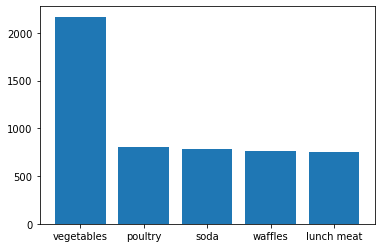

In [9]:
#plot and explore dataset#
fig=plt.figure()
x= data['Item'].value_counts()
x=x.sort_values(ascending = False)
x = x[:5]

plt.bar(x.index, height = x.values)

In [10]:
#One-hot representation of items bought
one_hot = pd.get_dummies(data['Item'])
data.drop('Item',inplace=True,axis=1)
data_enc = data.join(one_hot)
data_enc.head()

,PurchaseID,Date,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,1,1/1/2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1/1/2000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1/1/2000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1/1/2000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1/1/2000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
grouped = data_enc.groupby(["PurchaseID","Date"])[Total_products[:]].apply(sum)
grouped = grouped.reset_index()[Total_products]
grouped.head()

,laundry detergent,flour,butter,soap,aluminum foil,yogurt,beef,mixes,shampoo,lunch meat,...,spaghetti sauce,eggs,sandwich loaves,ketchup,juice,paper towels,pasta,coffee/tea,fruits,sugar
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,0,0,0,0,1,1,...,3,1,1,2,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,...,1,1,1,0,0,1,1,0,0,0


In [12]:
#Replace the non-zero items with product names
def get_product_names(x):
    for product in Total_products:
        if x[product] > 0:
            x[product] = product
    return x

grouped = grouped.apply(get_product_names, axis=1)
grouped.head()

,laundry detergent,flour,butter,soap,aluminum foil,yogurt,beef,mixes,shampoo,lunch meat,...,spaghetti sauce,eggs,sandwich loaves,ketchup,juice,paper towels,pasta,coffee/tea,fruits,sugar
0,laundry detergent,flour,butter,soap,aluminum foil,yogurt,beef,mixes,shampoo,lunch meat,...,0,0,0,0,0,0,0,0,0,0
1,laundry detergent,0,0,0,aluminum foil,yogurt,0,mixes,shampoo,0,...,0,0,0,0,0,0,0,0,0,0
2,laundry detergent,0,0,soap,0,0,0,0,shampoo,lunch meat,...,spaghetti sauce,eggs,sandwich loaves,ketchup,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,lunch meat,...,0,0,0,0,juice,0,0,0,0,0
4,0,flour,0,0,0,yogurt,0,mixes,0,0,...,spaghetti sauce,eggs,sandwich loaves,0,0,paper towels,pasta,0,0,0


In [13]:
#Removing the items not purchased 
x = grouped.values
x= [num[~(num == 0)].tolist() for num in x if num[num !=0].tolist()]
data1 = x

In [14]:
print("Total transactions: {}".format(len(grouped)))

Total transactions: 1499


In [15]:
data1[0:5]

[['laundry detergent',
  'flour',
  'butter',
  'soap',
  'aluminum foil',
  'yogurt',
  'beef',
  'mixes',
  'shampoo',
  'lunch meat',
  'dinner rolls',
  'pork',
  'all- purpose',
  'sandwich bags',
  'ice cream',
  'vegetables',
  'soda'],
 ['laundry detergent',
  'aluminum foil',
  'yogurt',
  'mixes',
  'shampoo',
  'sandwich bags',
  'vegetables',
  'hand soap',
  'waffles',
  'cheeses',
  'toilet paper',
  'milk',
  'dishwashing liquid/detergent',
  'cereals',
  'individual meals',
  'tortillas'],
 ['laundry detergent',
  'soap',
  'shampoo',
  'lunch meat',
  'dinner rolls',
  'pork',
  'ice cream',
  'vegetables',
  'soda',
  'hand soap',
  'cheeses',
  'toilet paper',
  'milk',
  'cereals',
  'poultry',
  'bagels',
  'spaghetti sauce',
  'eggs',
  'sandwich loaves',
  'ketchup'],
 ['lunch meat', 'all- purpose', 'soda', 'toilet paper', 'cereals', 'juice'],
 ['flour',
  'yogurt',
  'mixes',
  'dinner rolls',
  'pork',
  'all- purpose',
  'vegetables',
  'soda',
  'hand soap',


In [25]:
#Applying Association Rules
rules = apriori(data1,min_support=0.2,min_confidence=0.75,min_length =2,min_lift=1,target="rules")
association_results = list(rules)
association_results

[RelationRecord(items=frozenset({'all- purpose', 'vegetables'}), support=0.28552368245497, ordered_statistics=[OrderedStatistic(items_base=frozenset({'all- purpose'}), items_add=frozenset({'vegetables'}), confidence=0.7711711711711713, lift=1.0615110978747344)]),
 RelationRecord(items=frozenset({'aluminum foil', 'vegetables'}), support=0.3095396931287525, ordered_statistics=[OrderedStatistic(items_base=frozenset({'aluminum foil'}), items_add=frozenset({'vegetables'}), confidence=0.8013816925734024, lift=1.1030956447819378)]),
 RelationRecord(items=frozenset({'vegetables', 'bagels'}), support=0.2941961307538359, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bagels'}), items_add=frozenset({'vegetables'}), confidence=0.7696335078534031, lift=1.05939451631979)]),
 RelationRecord(items=frozenset({'beef', 'vegetables'}), support=0.2808539026017345, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'vegetables'}), confidence=0.761301989150

In [26]:
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

In [27]:
df.sort_values(by ='Lift', ascending = False, inplace = True)
df

,Items,Antecedent,Consequent,Support,Confidence,Lift
34,"{yogurt, vegetables}",{yogurt},{vegetables},0.308205,0.814815,1.121586
9,"{eggs, vegetables}",{eggs},{vegetables},0.310874,0.814685,1.121408
17,"{laundry detergent, vegetables}",{laundry detergent},{vegetables},0.304203,0.809947,1.114885
1,"{aluminum foil, vegetables}",{aluminum foil},{vegetables},0.309540,0.801382,1.103096
30,"{sugar, vegetables}",{sugar},{vegetables},0.293529,0.800000,1.101194
25,"{vegetables, sandwich loaves}",{sandwich loaves},{vegetables},0.283522,0.794393,1.093475
24,"{sandwich bags, vegetables}",{sandwich bags},{vegetables},0.284857,0.790741,1.088448
6,"{cheeses, vegetables}",{cheeses},{vegetables},0.303536,0.784483,1.079834
23,"{vegetables, poultry}",{poultry},{vegetables},0.320213,0.783034,1.077841
29,"{vegetables, spaghetti sauce}",{spaghetti sauce},{vegetables},0.287525,0.782214,1.076712


In [28]:
!pip install plotly

In [29]:
import plotly.express as px
fig = px.scatter(df, x ='Support', y='Confidence', color = 'Lift', color_continuous_scale ='agsunset')
fig.show()